<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

5.10.0


## Data preparation

In [2]:
df = pd.read_csv("../../data/wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.set_index('date')

In [3]:
df.shape

(383, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    383 non-null    object
 1   count   383 non-null    int64 
 2   lang    383 non-null    object
 3   page    383 non-null    object
 4   rank    383 non-null    int64 
 5   month   383 non-null    int64 
 6   title   383 non-null    object
dtypes: int64(3), object(4)
memory usage: 23.9+ KB


## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
plotly_df(df.set_index("date")[["count"]])

In [13]:
from prophet import Prophet

In [14]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426
- 5229
- 2744

In [17]:
df_train = df[:-predictions]
df_train.shape

(353, 2)

In [29]:
df_valid = df[-predictions:]
df_valid.shape

(30, 2)

In [18]:
model = Prophet()
model.fit(df_train)

23:05:16 - cmdstanpy - INFO - Chain [1] start processing
23:05:16 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
prophet_preds = model.predict(df[-predictions:])

In [27]:
prophet_preds.iloc[-1, :]

ds                            2016-01-20 00:00:00
trend                                 2996.159485
yhat_lower                            3012.884282
yhat_upper                            3843.508595
trend_lower                           2972.705933
trend_upper                           3019.718502
additive_terms                         425.717294
additive_terms_lower                   425.717294
additive_terms_upper                   425.717294
weekly                                 425.717294
weekly_lower                           425.717294
weekly_upper                           425.717294
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   3421.87678
Name: 29, dtype: object

**<font color='red'>Answer 1:</font>** So right answer is 3426

Estimate the quality of the prediction with the last 30 points.

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600
- 903

In [28]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [38]:
df_future = model.make_future_dataframe(predictions)
df_future = model.predict(df_future)
df_future.shape

(383, 16)

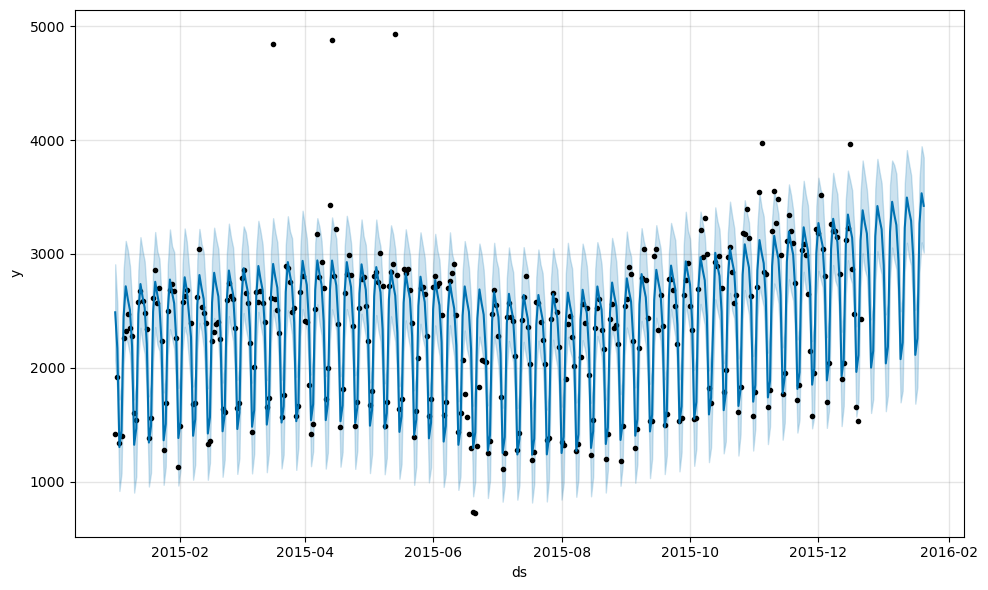

In [47]:
model.plot(df_future);

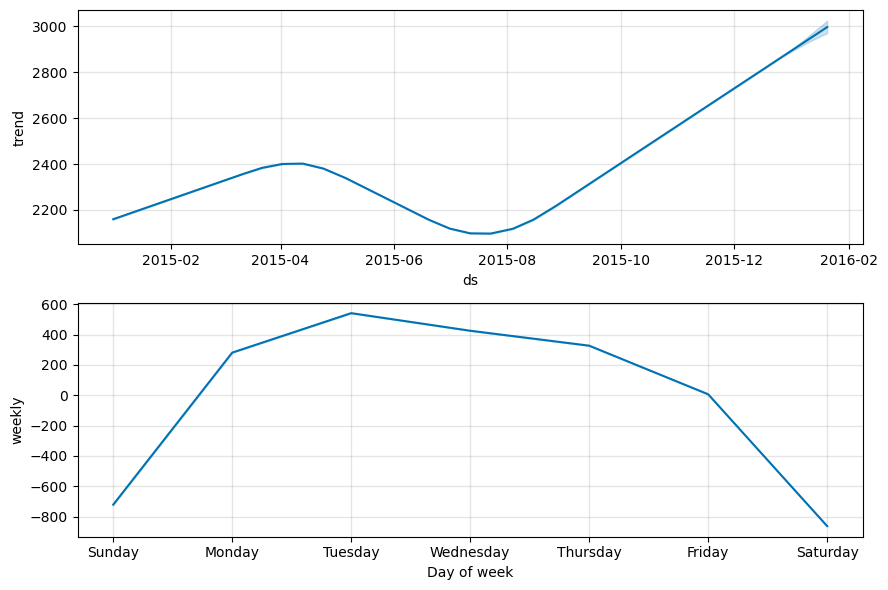

In [48]:
model.plot_components(df_future);

In [30]:
df_valid.columns

Index(['ds', 'y'], dtype='object')

In [31]:
prophet_preds.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [32]:
mean_absolute_percentage_error(df_valid.y, prophet_preds.yhat)

0.34336502083174547

In [33]:
mean_absolute_error(df_valid.y, prophet_preds.yhat)

596.3839898481082

**<font color='red'>Answers 2 and 3:</font>**
mape = 34.5, mae = 600

## Predicting with ARIMA

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

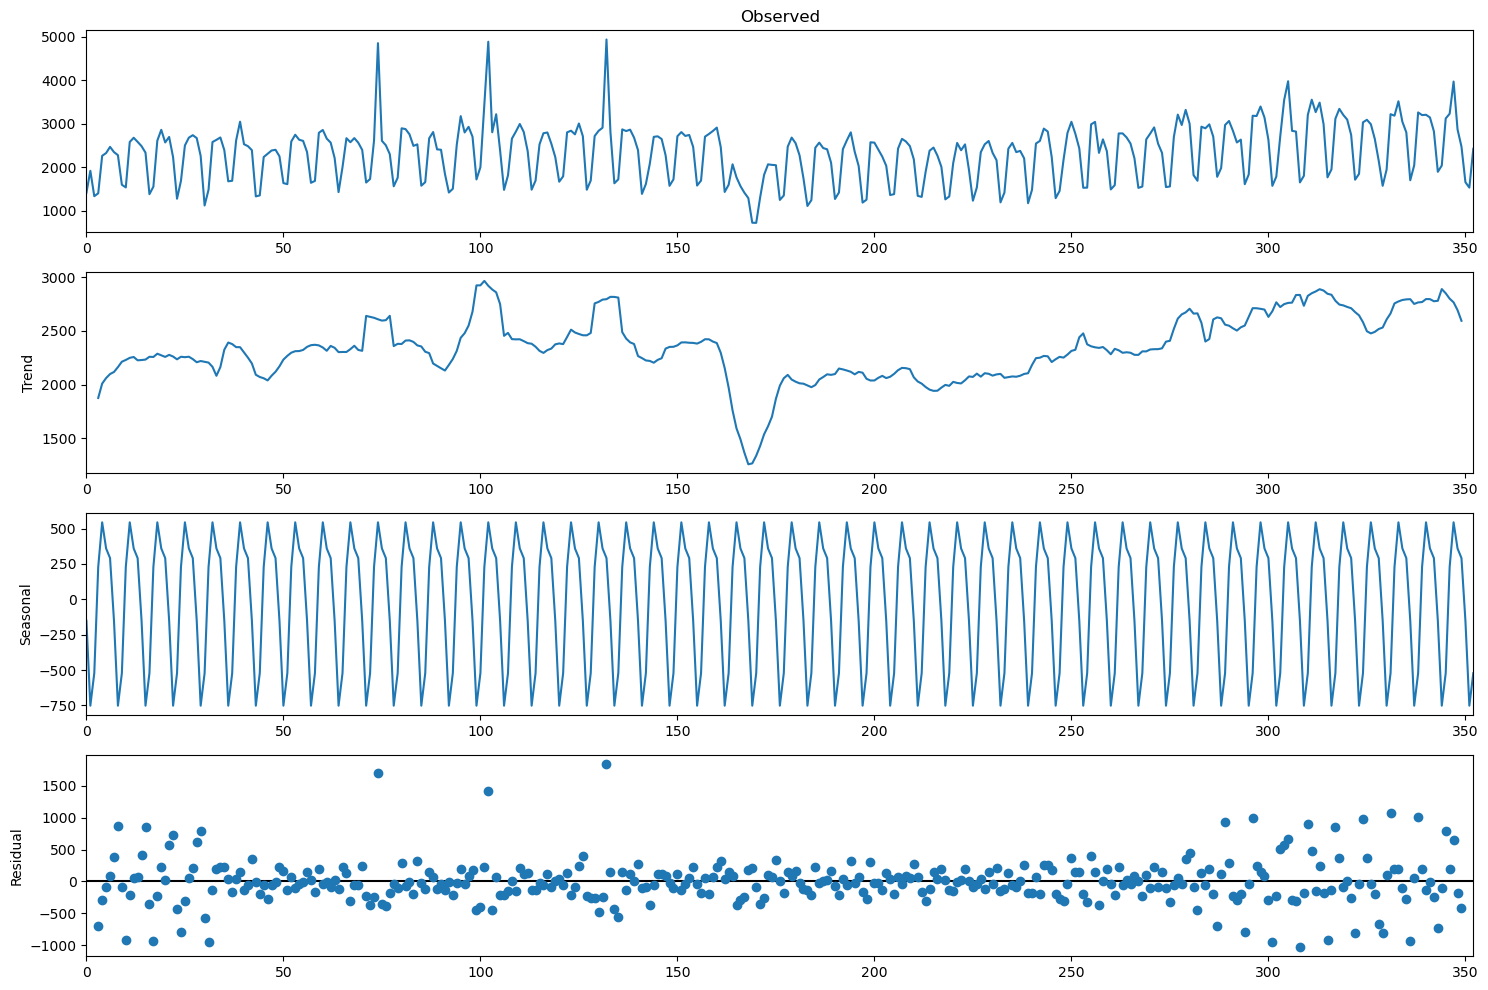

In [46]:
sm.tsa.seasonal_decompose(df_train["y"].values, period=7).plot();

In [52]:
print(f"Dickey-Fuller test p-val: {sm.tsa.adfuller(df_train['y'].values)[1]}")

Dickey-Fuller test p-val: 0.10739219627612118


**<font color='red'>Answer 4:</font>** p-value is too big, we can't reject null-hypothesis. TS is not stationary.

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

In [ ]:
sm.tsa.statespace.SARIMAX